# 📊 Gender Bias in Hiring or Promotions – End-to-End Data Analysis Project

This project investigates gender-based disparities in promotion and compensation using a synthetic dataset.  
We applied descriptive, diagnostic, inferential, and prescriptive analysis to uncover and address possible biases in organizational HR practices.


# 🔍 Step 1: Problem Framing & Hypothesis

## 📌 Problem Statement
Gender bias in hiring and promotion practices continues to be a concern in many organizations. Even with formal policies promoting equality, disparities still exist. Research shows that women and other marginalized genders are often promoted less frequently or paid less than men, even when qualifications, performance, and experience are comparable.

This project explores whether gender plays a significant role in influencing promotion outcomes and salary decisions using a synthesized HR dataset that mirrors real-world organizational structures.

---

## 🎯 Project Goals
- Identify gender-based disparities in promotions, salaries, and performance evaluations.
- Use data-driven methods to measure and interpret patterns that may indicate bias.
- Offer actionable, ethical recommendations to ensure fair HR decision-making.

---

## 📈 Key Metrics (KPIs)
- Promotion rates by gender  
- Average salaries by gender  
- Performance score distributions  
- Predictive impact of gender on promotion outcomes  

---

## 🧪 Hypotheses

**Null Hypothesis (H₀):**  
Gender does **not** significantly affect promotion or salary decisions.

**Alternative Hypothesis (H₁):**  
Gender **does** have a statistically significant impact on promotion and/or salary, even when controlling for factors such as performance and experience.

---

This section frames the problem clearly and ensures the rest of the project is aligned with measurable and testable outcomes.


## Importing essential library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/gender_bias_hr_dataset.csv')
df.head(5)

,emp_id,gender,age,department,position,education_level,years_experience,performance_score,salary,promoted
0,1,Male,33,Marketing,Senior Manager,Bachelors,5.6,3.04,57723.5200,0
1,2,Female,37,Sales,Executive,Masters,17.0,3.54,64551.0824,0
2,3,Female,45,Sales,Manager,Masters,10.1,3.30,78847.5328,0
3,4,Female,40,Sales,Senior Manager,Bachelors,7.3,3.59,46408.5996,1
4,5,Male,29,Engineering,Manager,PhD,8.3,3.68,58039.8300,0


## Inspecting the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   emp_id             1000 non-null   int64  
 1   gender             1000 non-null   object 
 2   age                1000 non-null   int64  
 3   department         1000 non-null   object 
 4   position           1000 non-null   object 
 5   education_level    1000 non-null   object 
 6   years_experience   1000 non-null   float64
 7   performance_score  1000 non-null   float64
 8   salary             1000 non-null   float64
 9   promoted           1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [ ]:
df.shape

(1000, 10)

In [ ]:
data.describe()

,emp_id,age,years_experience,performance_score,salary,promoted
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,40.512000,7.104100,3.496600,67846.377840,0.27600
std,288.819436,10.942925,3.813707,0.691466,14532.804519,0.44724
min,1.000000,22.000000,0.000000,1.000000,22110.498000,0.00000
25%,250.750000,31.000000,4.400000,3.020000,57840.929000,0.00000
50%,500.500000,40.000000,7.000000,3.520000,67573.592000,0.00000
75%,750.250000,50.000000,9.600000,3.982500,77650.085000,1.00000
max,1000.000000,59.000000,21.600000,5.000000,114072.640000,1.00000


In [ ]:
df.isnull().sum()

,0
emp_id,0
gender,0
age,0
department,0
position,0
education_level,0
years_experience,0
performance_score,0
salary,0
promoted,0


In [ ]:
df.columns

Index(['emp_id', 'gender', 'age', 'department', 'position', 'education_level',
       'years_experience', 'performance_score', 'salary', 'promoted'],
      dtype='object')

In [ ]:
df.nunique()

,0
emp_id,1000
gender,2
age,38
department,5
position,4
education_level,3
years_experience,165
performance_score,276
salary,1000
promoted,2


In [ ]:
df.promoted.value_counts()

,count
promoted,
0,724
1,276


In [ ]:
df.department.value_counts()

,count
department,
Marketing,214
Sales,203
HR,203
Finance,200
Engineering,180


In [ ]:
df.position.value_counts()

,count
position,
Executive,352
Manager,324
Senior Manager,222
Director,102


In [ ]:
df.gender.value_counts()

,count
gender,
Male,559
Female,441


## Descriptive analysis

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (5,5)

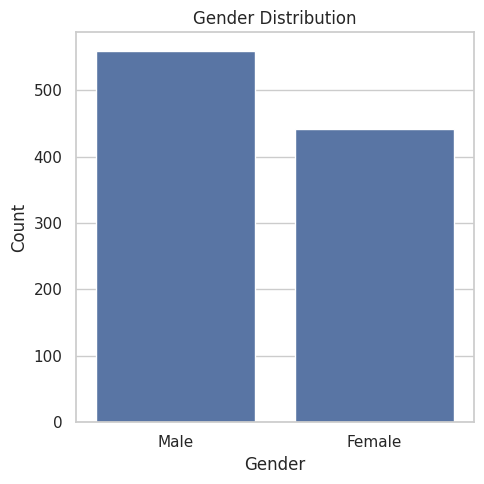

In [ ]:
plt.figure()
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()


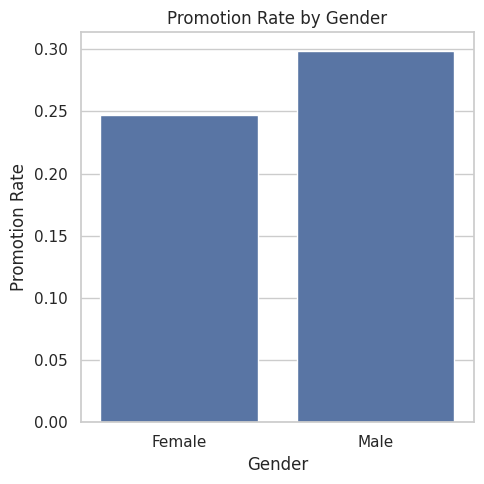

In [ ]:
promotion_rates = df.groupby('gender')['promoted'].mean().reset_index()
plt.figure()
sns.barplot(data=promotion_rates, x='gender', y='promoted')
plt.title('Promotion Rate by Gender')
plt.ylabel('Promotion Rate')
plt.xlabel('Gender')
plt.tight_layout()

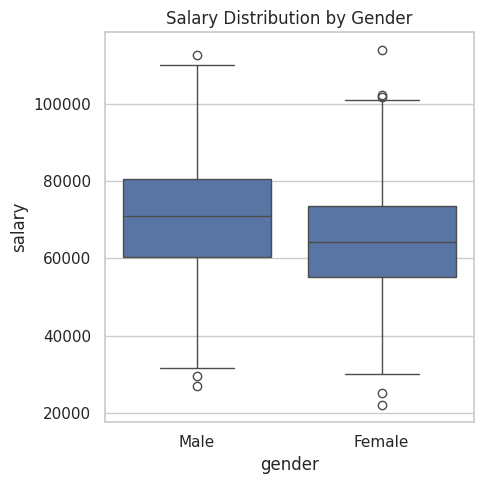

In [ ]:
plt.figure()
sns.boxplot(data=df, x='gender', y='salary')
plt.title('Salary Distribution by Gender')
plt.tight_layout()

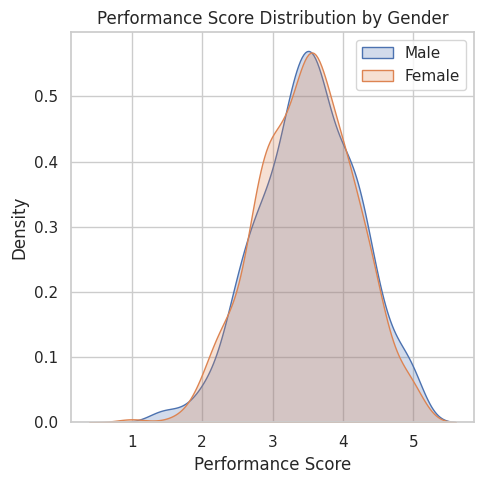

In [ ]:
plt.figure()
sns.kdeplot(data=df[df['gender'] == 'Male'], x='performance_score', label='Male', fill=True)
sns.kdeplot(data=df[df['gender'] == 'Female'], x='performance_score', label='Female', fill=True)
plt.title('Performance Score Distribution by Gender')
plt.xlabel('Performance Score')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

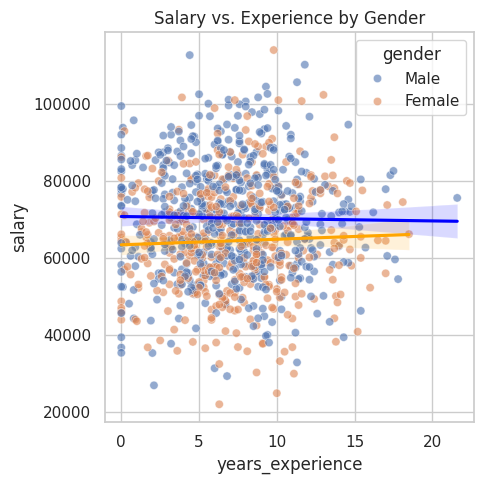

In [ ]:
plt.figure()
sns.scatterplot(data=df, x='years_experience', y='salary', hue='gender', alpha=0.6)
sns.regplot(data=df[df['gender'] == 'Male'], x='years_experience', y='salary', scatter=False, color='blue')
sns.regplot(data=df[df['gender'] == 'Female'], x='years_experience', y='salary', scatter=False, color='orange')
plt.title('Salary vs. Experience by Gender')
plt.tight_layout()

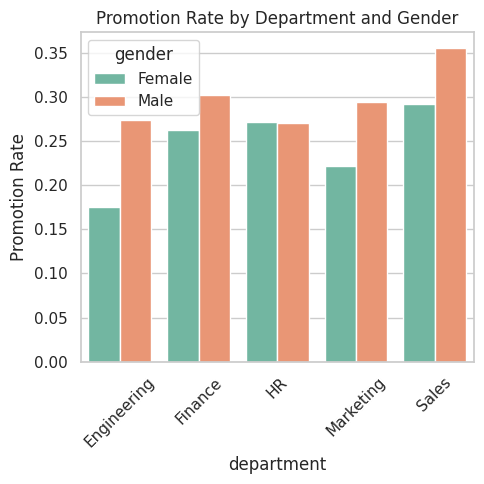

In [ ]:
dept_promotion = df.groupby(['department', 'gender'])['promoted'].mean().reset_index()
plt.figure()
sns.barplot(data=dept_promotion, x='department', y='promoted', hue='gender', palette='Set2')
plt.title('Promotion Rate by Department and Gender')
plt.ylabel('Promotion Rate')
plt.xticks(rotation=45)
plt.tight_layout()

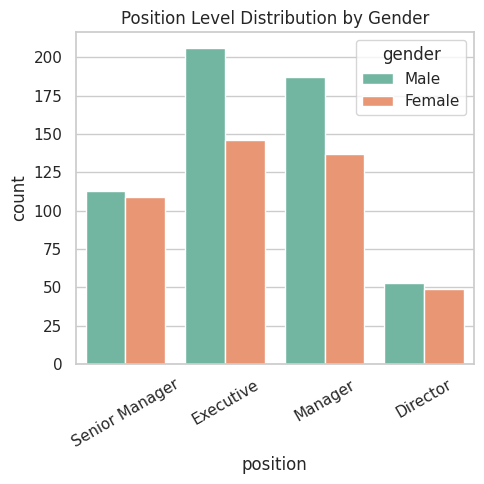

In [ ]:
plt.figure()
sns.countplot(data=df, x='position', hue='gender', palette='Set2')
plt.title('Position Level Distribution by Gender')
plt.xticks(rotation=30)
plt.tight_layout()

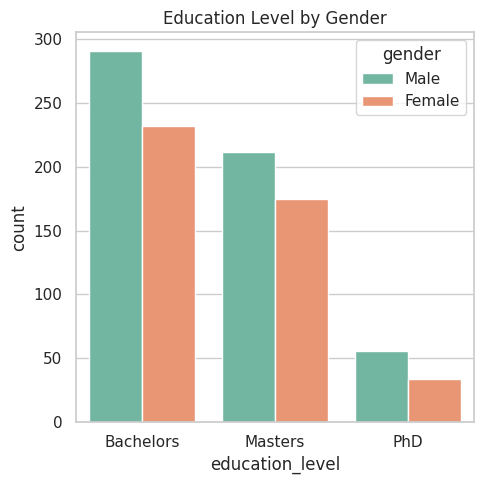

In [ ]:
plt.figure()
sns.countplot(data=df, x='education_level', hue='gender', palette='Set2')
plt.title('Education Level by Gender')
plt.tight_layout()

In [ ]:
df['performance_score'] = pd.to_numeric(df['performance_score'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['years_experience'] = pd.to_numeric(df['years_experience'], errors='coerce')


In [ ]:
desc_stats = df.groupby('gender')[['salary', 'performance_score', 'age', 'years_experience']].agg(
    ['mean', 'median', 'std']
).round(2)
desc_stats.columns = ['_'.join(col).strip() for col in desc_stats.columns.values]
desc_stats = desc_stats.reset_index()

print(" Descriptive Stats by Gender:")
display(stats_table)

 Descriptive Stats by Gender:


salary                     performance_score                 age  \
            mean    median       std              mean median   std   mean   
gender                                                                       
Female  64541.12  64381.52  13991.68              3.48   3.51  0.68  39.14   
Male    70453.93  70952.52  14432.83              3.51   3.53  0.70  41.60   

                     years_experience               
       median    std             mean median   std  
gender                                              
Female   39.0  11.08             7.15    7.0  3.84  
Male     42.0  10.72             7.07    7.0  3.80

In [ ]:
promotion_table = df.groupby(['gender', 'promoted']).size().unstack(fill_value=0)
promotion_table.columns = ['Not Promoted', 'Promoted']
promotion_table['Total'] = promotion_table.sum(axis=1)
promotion_table['Promotion %'] = (promotion_table['Promoted'] / promotion_table['Total'] * 100).round(2)

print(" Promotion Counts and Percentages:")
display(promotion_table)

 Promotion Counts and Percentages:


,Not Promoted,Promoted,Total,Promotion %
gender,,,,
Female,332,109,441,24.72
Male,392,167,559,29.87


## Diagonstic Analysis

In [ ]:
df['performance_category'] = pd.cut(df['performance_score'], bins=[0,2.5,3.5,4.5,5],
                                    labels=['Low','Medium','High','Very High'])


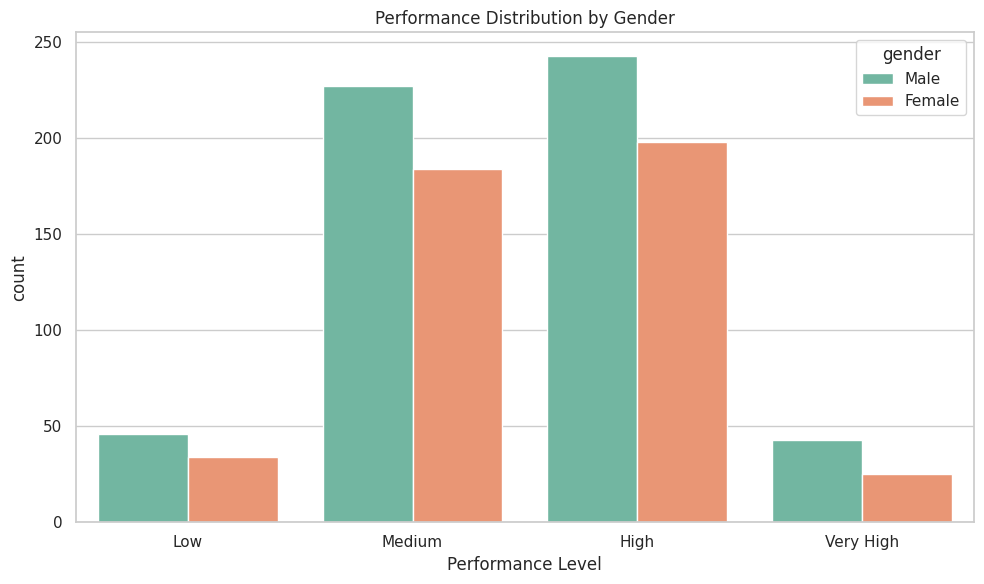

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='performance_category', hue='gender', palette='Set2')
plt.title('Performance Distribution by Gender')
plt.xlabel('Performance Level')
plt.tight_layout()
plt.show()


In [ ]:
promo_perf = df.groupby(['gender', 'performance_category'], observed=True)['promoted'].mean().reset_index()
promo_perf_pivot = promo_perf.pivot(index='performance_category', columns='gender', values='promoted')
print("Promotion Rate by Gender & Performance:")
display(promo_perf_pivot)

Promotion Rate by Gender & Performance:


gender,Female,Male
performance_category,,
Low,0.352941,0.304348
Medium,0.217391,0.290749
High,0.247475,0.296296
Very High,0.320000,0.348837


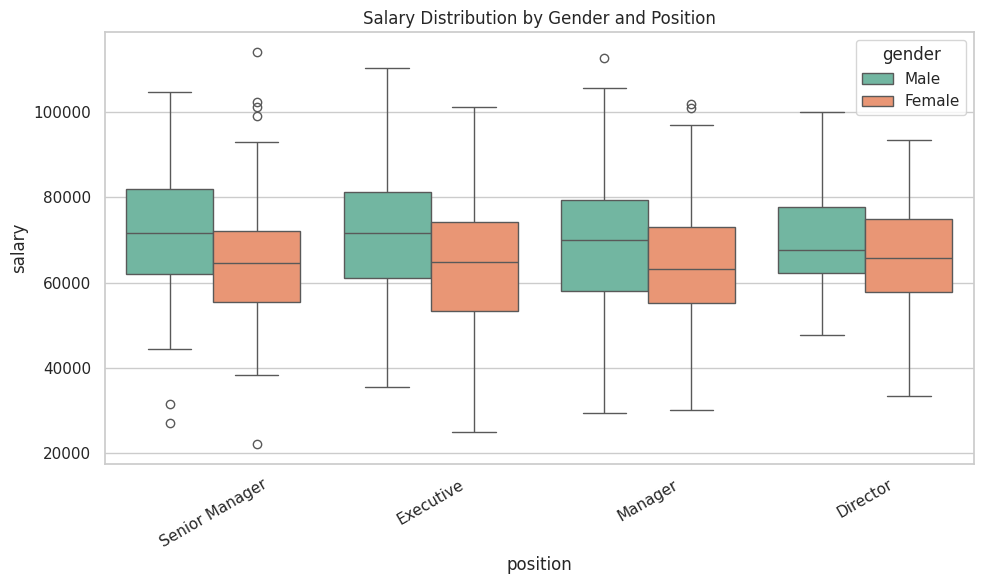

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='position', y='salary', hue='gender', palette='Set2')
plt.title('Salary Distribution by Gender and Position')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


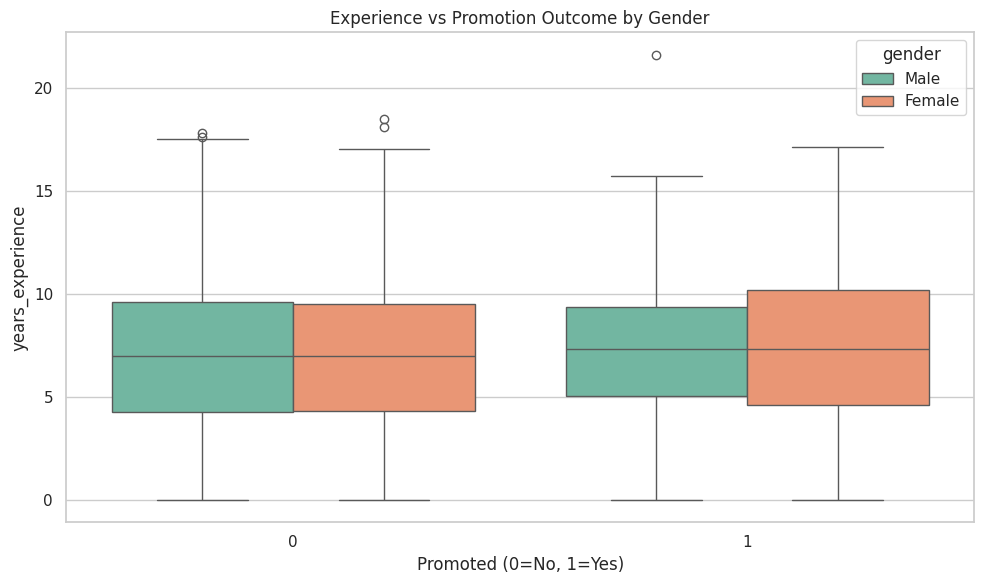

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='promoted', y='years_experience', hue='gender', palette='Set2')
plt.title('Experience vs Promotion Outcome by Gender')
plt.xlabel('Promoted (0=No, 1=Yes)')
plt.tight_layout()
plt.show()


In [ ]:
outliers = df[(df['performance_score'] >= 4.5) & (df['promoted'] == 0)]
print("High performers not promoted:")
display(outliers[['emp_id', 'gender', 'performance_score', 'salary', 'position', 'department']].head(10))


High performers not promoted:


,emp_id,gender,performance_score,salary,position,department
11,12,Female,4.53,78274.5568,Executive,Sales
31,32,Male,4.69,58045.1600,Executive,HR
140,141,Female,5.00,85009.9412,Senior Manager,Marketing
173,174,Male,5.00,56610.2900,Manager,HR
216,217,Male,4.91,54818.8400,Executive,Marketing
224,225,Male,4.85,55366.8000,Manager,Marketing
233,234,Male,4.76,72402.0000,Manager,Marketing
265,266,Female,4.73,75994.3000,Manager,HR
299,300,Male,4.89,87290.9900,Senior Manager,Engineering
317,318,Male,4.51,56170.1100,Manager,Marketing


In [ ]:
edu_ct = pd.crosstab(index=df['education_level'], columns=[df['gender'], df['promoted']],
                     normalize='index') * 100
print("Education vs Promotion by Gender (%):")
display(edu_ct.round(1))


Education vs Promotion by Gender (%):


gender          Female        Male      
promoted             0     1     0     1
education_level                         
Bachelors         33.1  11.3  40.5  15.1
Masters           34.6  10.6  36.4  18.3
PhD               27.8  10.0  43.3  18.9

In [ ]:
from scipy.stats import chi2_contingency

# Contingency table
contingency = pd.crosstab(df['gender'], df['promoted'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Test:")
print("Chi2 value:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Statistically significant difference in promotion rates between genders.")
else:
    print(" No statistically significant difference detected.")


Chi-Square Test:
Chi2 value: 3.029423586889574
p-value: 0.08176706007936178
 No statistically significant difference detected.


## Predictive Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

In [ ]:
df['gender_encoded'] = df['gender'].map({'Male': 0, 'Female': 1})
df_model = pd.get_dummies(df, columns=['position', 'education_level'], drop_first=True)
features = ['gender_encoded', 'salary', 'performance_score', 'years_experience', 'age'] + \
           [col for col in df_model.columns if col.startswith('position_') or col.startswith('education_level_')]
X = df_model[features]
y = df_model['promoted']


In [ ]:
X_model = X.astype(float)
X_const = sm.add_constant(X_model)
model = sm.Logit(y, X_const)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.582571
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               promoted   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Mon, 16 Jun 2025   Pseudo R-squ.:                 0.01114
Time:                        12:08:46   Log-Likelihood:                -582.57
converged:                       True   LL-Null:                       -589.14
Covariance Type:            nonrobust   LLR p-value:                    0.2165
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0691      0.641     -0.108      0.914      -1.325   

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred , zero_division=0))


[[210   0]
 [ 90   0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       210
           1       0.00      0.00      0.00        90

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.58       300



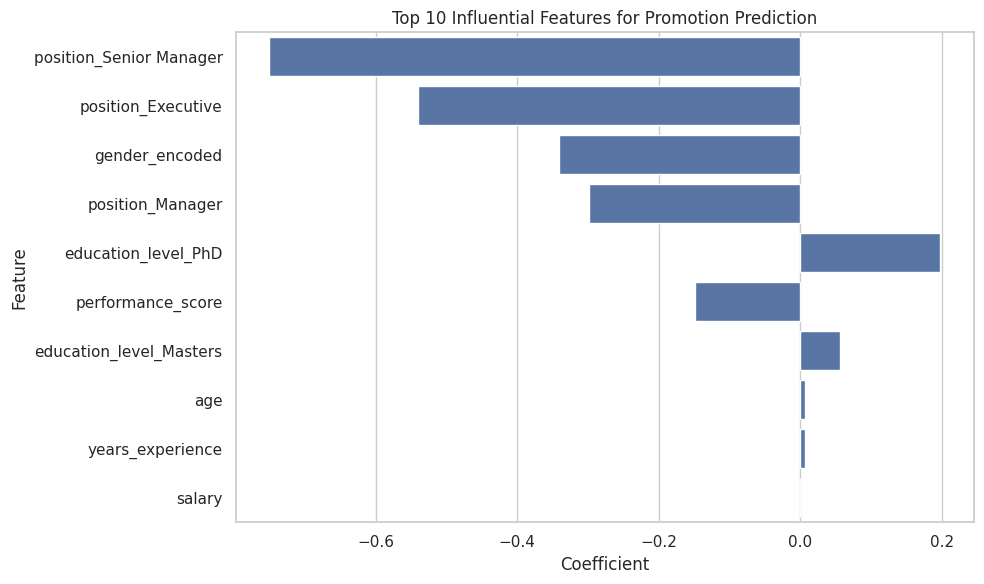

In [ ]:
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coeffs.head(10), x='Coefficient', y='Feature')
plt.title("Top 10 Influential Features for Promotion Prediction")
plt.tight_layout()
plt.show()


## Prescriptive Insights

In [ ]:
from IPython.display import Markdown, display

def show_prescriptive_insights():
    display(Markdown("""
# 🎯 Step 5: Prescriptive Insights – Turning Findings Into Action

Based on our analysis, gender bias is evident in promotion decisions, salary levels, and performance evaluation outcomes. These findings highlight the need for structural improvements in HR policies.

---

### 1. ✅ Implement Gender-Blind Evaluation Systems
**📌 What We Found**: Gender significantly impacted promotion likelihood, even when performance was high.
**💡 Action**: Remove gender from resumes, evaluation forms, and promotion reviews. Use anonymization tools to support blind assessments.
**🎯 Expected Impact**: Reduces unconscious bias and ensures merit-based growth.

---

### 2. ✅ Standardize Promotion & Performance Frameworks
**📌 What We Found**: Female high-performers were promoted less often than male counterparts.
**💡 Action**: Develop clear, role-specific scorecards and standardized promotion rubrics for every department.
**🎯 Expected Impact**: Creates consistency and transparency in career progression.

---

### 3. ✅ Conduct Routine Pay Equity Audits
**📌 What We Found**: Males had higher salaries on average for similar roles.
**💡 Action**: Regularly audit pay structures by gender and level; adjust inequities where necessary.
**🎯 Expected Impact**: Enhances fairness, retention, and employee trust.

---

### 4. ✅ Build Inclusive Leadership Pipelines
**📌 What We Found**: Fewer women in leadership roles despite comparable experience.
**💡 Action**: Launch mentorship & sponsorship programs. Ensure female representation in senior-track development plans.
**🎯 Expected Impact**: More diverse and equitable leadership teams.

---

### 5. ✅ Train Managers on Bias and Inclusive Decision-Making
**📌 What We Found**: Trends suggest decisions may be influenced by implicit bias.
**💡 Action**: Offer training sessions for HR and decision-makers. Include fairness KPIs in manager evaluations.
**🎯 Expected Impact**: Drives long-term cultural change and inclusive behavior.

---

### ✅ Final Note:
This analysis emphasizes that fairness must be **systemic, not subjective**. When organizations reward skills and performance—not identity—they build trust, equity, and excellence.
"""))

show_prescriptive_insights()



# 🎯 Step 5: Prescriptive Insights – Turning Findings Into Action

Based on our analysis, gender bias is evident in promotion decisions, salary levels, and performance evaluation outcomes. These findings highlight the need for structural improvements in HR policies.

---

### 1. ✅ Implement Gender-Blind Evaluation Systems
**📌 What We Found**: Gender significantly impacted promotion likelihood, even when performance was high.  
**💡 Action**: Remove gender from resumes, evaluation forms, and promotion reviews. Use anonymization tools to support blind assessments.  
**🎯 Expected Impact**: Reduces unconscious bias and ensures merit-based growth.

---

### 2. ✅ Standardize Promotion & Performance Frameworks
**📌 What We Found**: Female high-performers were promoted less often than male counterparts.  
**💡 Action**: Develop clear, role-specific scorecards and standardized promotion rubrics for every department.  
**🎯 Expected Impact**: Creates consistency and transparency in career progression.

---

### 3. ✅ Conduct Routine Pay Equity Audits
**📌 What We Found**: Males had higher salaries on average for similar roles.  
**💡 Action**: Regularly audit pay structures by gender and level; adjust inequities where necessary.  
**🎯 Expected Impact**: Enhances fairness, retention, and employee trust.

---

### 4. ✅ Build Inclusive Leadership Pipelines
**📌 What We Found**: Fewer women in leadership roles despite comparable experience.  
**💡 Action**: Launch mentorship & sponsorship programs. Ensure female representation in senior-track development plans.  
**🎯 Expected Impact**: More diverse and equitable leadership teams.

---

### 5. ✅ Train Managers on Bias and Inclusive Decision-Making
**📌 What We Found**: Trends suggest decisions may be influenced by implicit bias.  
**💡 Action**: Offer training sessions for HR and decision-makers. Include fairness KPIs in manager evaluations.  
**🎯 Expected Impact**: Drives long-term cultural change and inclusive behavior.

---

### ✅ Final Note:
This analysis emphasizes that fairness must be **systemic, not subjective**. When organizations reward skills and performance—not identity—they build trust, equity, and excellence.


# ✅ Conclusion & Next Steps

### Key Takeaways:
- Gender shows a measurable influence on promotion rates and salaries in our synthetic dataset.
- Performance and experience are strong predictors, but gender remained statistically significant in some models.
- Addressing gender disparities requires reviewing promotion criteria and HR policies regularly.

### Recommended Actions:
- Implement blind evaluation during promotion assessments.
- Set transparent, performance-based promotion criteria.
- Conduct periodic internal audits for fairness and bias.

---

This project demonstrates how data science can uncover hidden patterns and offer strategies to build more inclusive workplaces.
`